<a href="https://colab.research.google.com/github/Sitaoooo/B1-Project-Code/blob/master/laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Laplace approximation methods. Please complete the code below to obtain the Laplace approximate distribution of the MAP estimate of training parameters (slope and mean).

What do you observe when you increase the number of samples (i.e., n_samples below)?

Q2. Is the result of theta_map (i.e., the MAP estimation of theta) the same as the Ordinary Least Squares (OLS) solution with L2 regularization? Why?

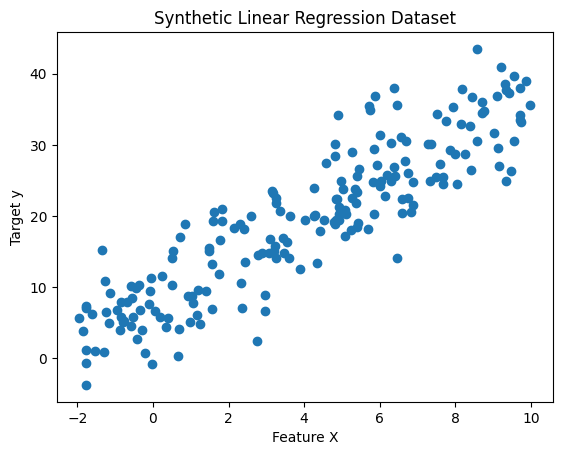

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic regression dataset, try to increase n_samples to sth larger, i.e., 500, 10000, 20000, ...
n_samples = 200
X = np.random.uniform(-2, 10, size=n_samples)
slope_mean = 3
intercept_mean = 8
true_slope = slope_mean
true_intercept = intercept_mean
noise = np.random.normal(0, 5, n_samples)  # Gaussian noise
y = true_slope * X + true_intercept + noise

# Plotting the dataset
plt.scatter(X, y)
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Synthetic Linear Regression Dataset')
plt.show()


# TODO: Define the linear model function
def linear_model(theta, X):
    return X @ theta

# Define the log-likelihood function
def log_likelihood(theta, X, y):
    predictions = linear_model(theta, X)
    return -0.5 * np.sum((y - predictions) ** 2)

# Define the log-prior function (Gaussian) with unit variance
def log_prior(theta, mean=0):
    return -0.5 * np.sum((theta[1] - mean) ** 2)

# TODO: Define the log-posterior function
def log_posterior(theta, X, y):
    return log_likelihood(theta, X, y) + log_prior(theta)

# Compute MAP estimate
X_with_intercept = np.column_stack((np.ones(n_samples), X))
initial_theta = np.zeros(2)
# below minimize function will try to minimize the neg-log function over theta
# starting from the initial value initial_theta
result = minimize(lambda theta: -log_posterior(theta, X_with_intercept, y), initial_theta)
theta_map = result.x

# Compute Hessian matrix
def compute_hessian(X):
    mat = np.array([[0,0],[0,1]])
    # the @ sign is another notation for matrix product, X.T is the transpose of X
    return X.T @ X + mat

# TODO: Please fill below two lines
Hessian = compute_hessian(X_with_intercept)
posterior_covariance = - np.linalg.inv(Hessian)

<ipython-input-4-1d71c903b971>:3: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(theta_values, norm.pdf(theta_values, theta_map[0], np.sqrt(posterior_covariance[0, 0])), label='Approximate Posterior (Intercept)')


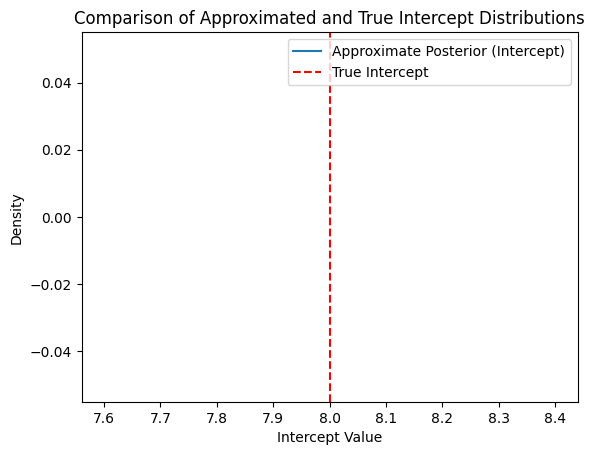

<ipython-input-4-1d71c903b971>:12: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(theta_values, norm.pdf(theta_values, theta_map[1], np.sqrt(posterior_covariance[1, 1])), label='Approximate Posterior (Slope)')


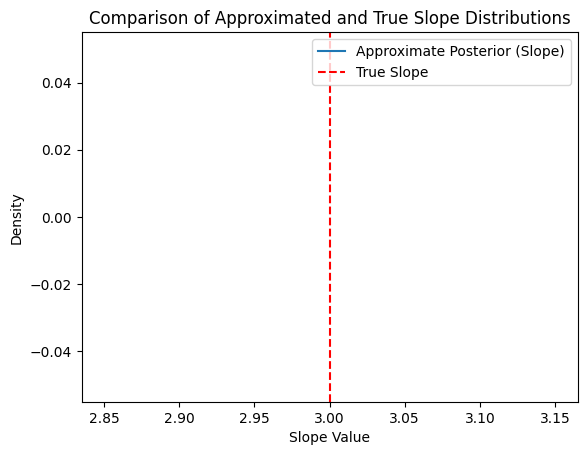

True Parameters mean: Intercept: 8 , Slope: 3
MAP Estimates: [8.17453166 2.81626852]
Posterior Covariance Matrix:
 [[-0.01190729  0.00172456]
 [ 0.00172456 -0.00043057]]


In [4]:
# Plotting the approximated posterior and true distributions
theta_values = np.linspace(theta_map[0] - 2, theta_map[0] + 2, 100)
plt.plot(theta_values, norm.pdf(theta_values, theta_map[0], np.sqrt(posterior_covariance[0, 0])), label='Approximate Posterior (Intercept)')
plt.axvline(x=intercept_mean, color='red', linestyle='--', label='True Intercept')
plt.xlabel('Intercept Value')
plt.ylabel('Density')
plt.legend()
plt.title('Comparison of Approximated and True Intercept Distributions')
plt.show()

theta_values = np.linspace(theta_map[1] - 2, theta_map[1] + 2, 100)
plt.plot(theta_values, norm.pdf(theta_values, theta_map[1], np.sqrt(posterior_covariance[1, 1])), label='Approximate Posterior (Slope)')
plt.axvline(x=slope_mean, color='red', linestyle='--', label='True Slope')
plt.xlabel('Slope Value')
plt.ylabel('Density')
plt.legend()
plt.title('Comparison of Approximated and True Slope Distributions')
plt.show()

# Print the results
print("True Parameters mean: Intercept:", intercept_mean, ", Slope:", slope_mean)
print("MAP Estimates:", theta_map)
print("Posterior Covariance Matrix:\n", posterior_covariance)